In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from house_prices_kaggle.utils import Utils

In [3]:
utils = Utils()

In [4]:
df = pd.read_csv('../../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


**Data Preprocessing**
<br>
*Duplicates*

In [8]:
def check_duplicates(dataframe: pd.DataFrame) -> None:
    duplicates = dataframe[dataframe.duplicated(keep=False)]
    if duplicates.empty:
        print('There are no duplicate entries in this dataset.')
    else:
        print(f'There are {len(duplicates)} duplicate entries in this dataset.')

In [9]:
check_duplicates(df)

There are no duplicate entries in this dataset.


*Missing Values*

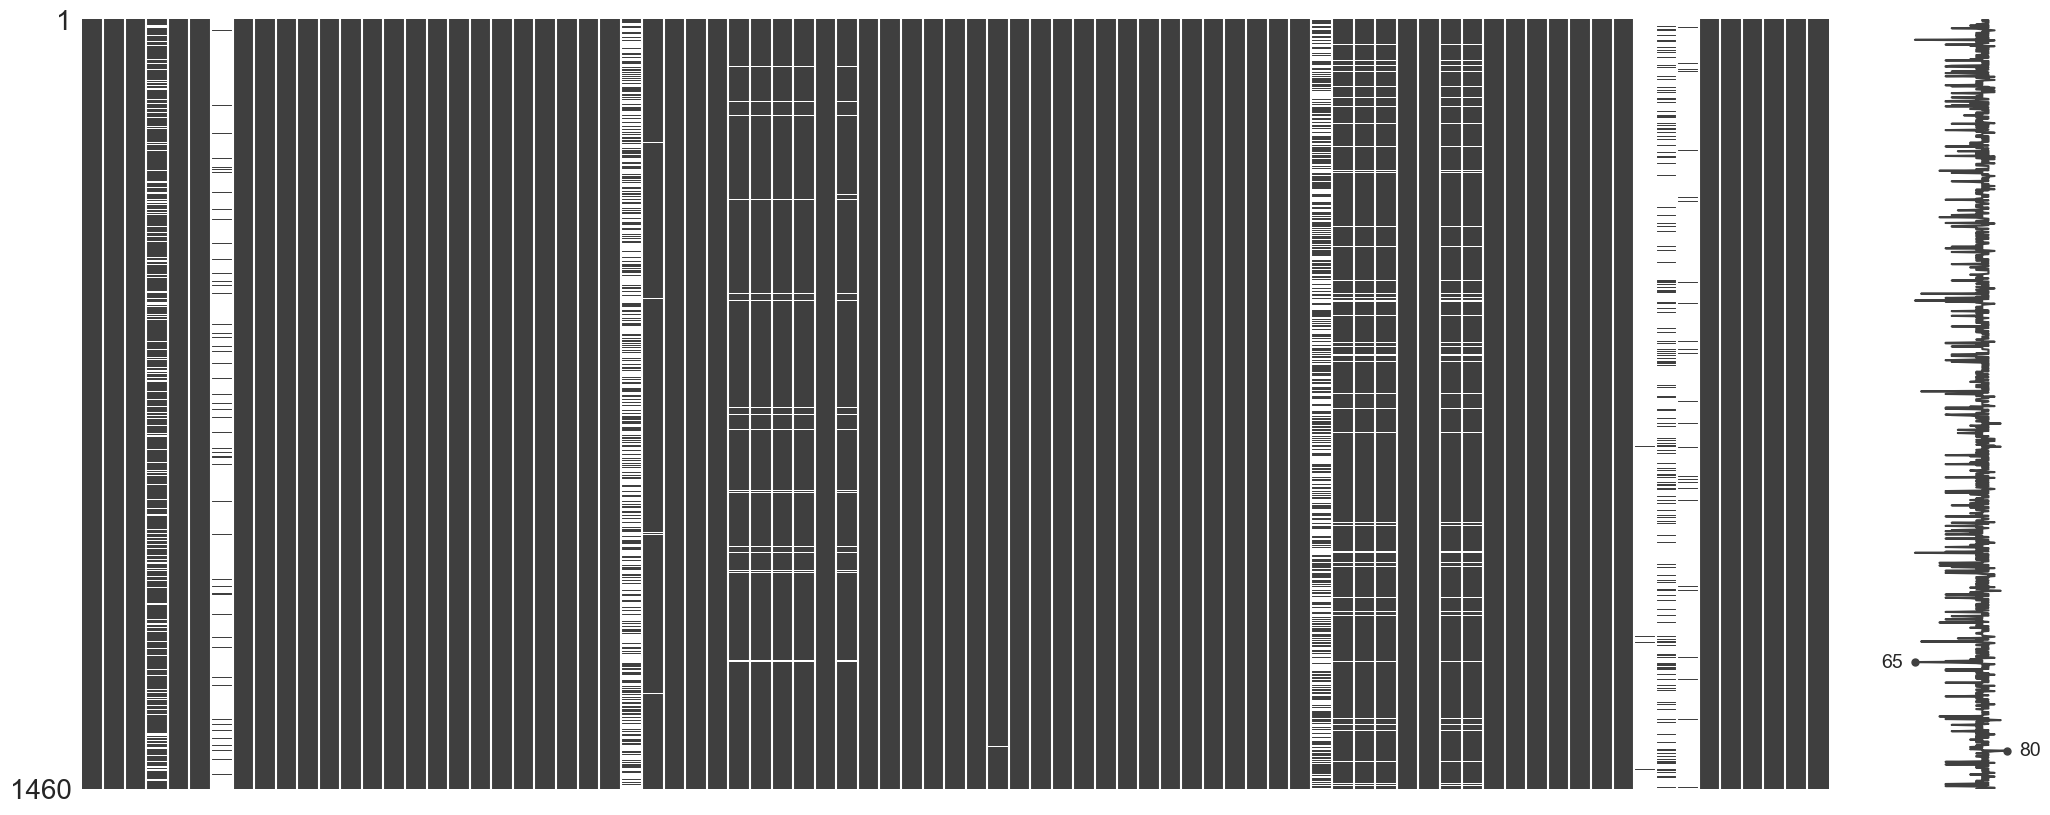

In [10]:
msno.matrix(df);

In [11]:
utils.missing_values_percentage(df)

There are 0.0% complete rows in this dataset.
Missing values in percentage:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64%


Handling missing values for fields with default 'N/A' like values. These were marked as .isna() true due to default pandas import configuration. Configuration has not been changed intentionally.

In [12]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [13]:
# Check correlation between 'PoolCQ' and 'SalePrice'.
poolqc_corr = df['PoolQC'].fillna('No Pool').map({'Ex': 4, 'Gd': 3, 'Fa': 2, 'No Pool': 1}).corr(df['SalePrice'])
poolqc_corr

np.float64(0.11967966506875931)

In [14]:
# Correlation is low, feature can be deleted or imputed with 'No Pool' value.
df['PoolQC'] = df['PoolQC'].fillna('No Pool')

In [15]:
# Apply logic above to similar fields
df['MiscFeature'] = df['MiscFeature'].fillna('No feature')
df['Alley'] = df['Alley'].fillna('No Alley')
df['Fence'] = df['Fence'].fillna('No Fence')
df['MasVnrType'] = df['MasVnrType'].fillna('No masonry veneer')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No fireplace')

LotFrontage imputation

In [16]:
df[df['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,No Alley,IR2,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,GdWo,No feature,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,MnPrv,No feature,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,5,2009,WD,Normal,121000


In [17]:
# Explore variation in lotfrontage median based on different neighbourhoods
df.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [18]:
# Conduct neighbourhood based imputation
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Garage related fields imputation

In [19]:
df[df['GarageYrBlt'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,MnPrv,No feature,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,12,2008,WD,Normal,122000
1407,1408,20,RL,73.0,8780,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,MnPrv,No feature,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,9,2009,WD,Normal,136000


Garage related fields can have missing values, because property might have no garage, hence these records can be informative.

In [21]:
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

Basement related fields imputation

In [23]:
df[df['BsmtCond'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,No Alley,Reg,Bnk,AllPub,...,0,No Pool,No Fence,No feature,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,MnPrv,No feature,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,12,2008,WD,Normal,97000
342,343,90,RL,73.0,8544,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,7,2008,WD,Normal,134432


Basement related fields can have missing values, because property might have no basement, hence these records can be informative.

In [24]:
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')

MasVnrArea imputation

In [25]:
df[df['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,65.0,7851,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,5,2010,WD,Normal,216500
529,530,20,RL,74.0,32668,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,3,2008,WD,Normal,237000


In [26]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

Electrical Imputation

In [27]:
df[df['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,5,2008,WD,Normal,167500


In [28]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [29]:
utils.missing_values_percentage(df)

There are 100.0% complete rows in this dataset.
Missing values in percentage:
Series([], dtype: float64)%


**Data Preprocessing**
<br>
*Handling outliers*

In [30]:
numerical_features = df.select_dtypes(include=['int64', 'float']).columns

outlier_count = {}
for feature in numerical_features:
    outlier_count[feature] = utils.detect_iqr_outliers(dataframe=df, column=feature)

In [31]:
outlier_count = {k: v for k, v in sorted(outlier_count.items(), key=lambda x: x[1], reverse=True)}
outlier_count

{'EnclosedPorch': 208,
 'BsmtFinSF2': 167,
 'OverallCond': 125,
 'ScreenPorch': 116,
 'MSSubClass': 103,
 'MasVnrArea': 98,
 'LotFrontage': 93,
 'BsmtHalfBath': 82,
 'GarageYrBlt': 81,
 'OpenPorchSF': 77,
 'LotArea': 69,
 'KitchenAbvGr': 68,
 'TotalBsmtSF': 61,
 'SalePrice': 61,
 'MiscVal': 52,
 'BedroomAbvGr': 35,
 'WoodDeckSF': 32,
 'GrLivArea': 31,
 'TotRmsAbvGrd': 30,
 'BsmtUnfSF': 29,
 'LowQualFinSF': 26,
 '3SsnPorch': 24,
 'GarageArea': 21,
 '1stFlrSF': 20,
 'YearBuilt': 7,
 'BsmtFinSF1': 7,
 'PoolArea': 7,
 'Fireplaces': 5,
 'GarageCars': 5,
 'OverallQual': 2,
 '2ndFlrSF': 2,
 'BsmtFullBath': 1,
 'Id': 0,
 'YearRemodAdd': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'MoSold': 0,
 'YrSold': 0}

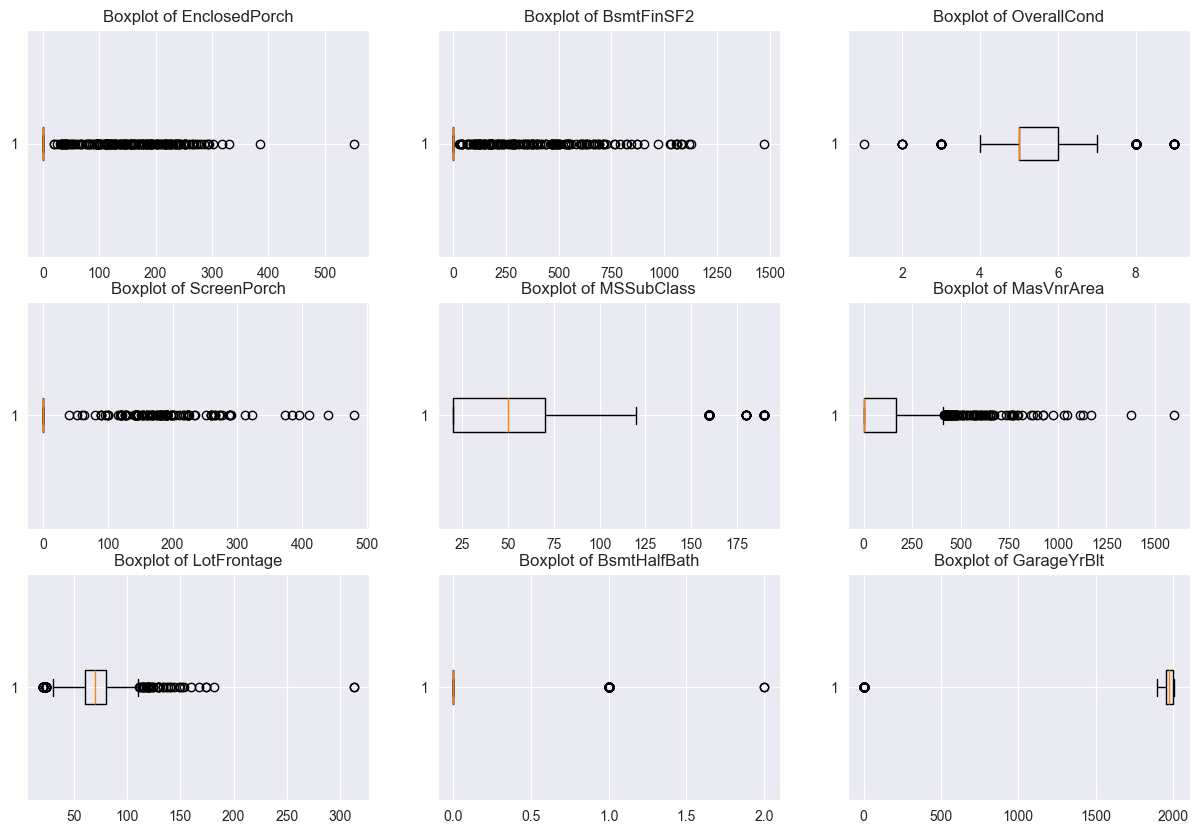

In [32]:
top_outliers = {k: v for k, v in outlier_count.items() if v > 80}
list_of_top_outliers = list(top_outliers.keys())

plt.figure(figsize=(15, 10))
for i, feature in enumerate(list_of_top_outliers, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[feature].dropna(), vert=False)
    plt.title(f'Boxplot of {feature}')

Capping of these fields is not needed. One part of the features should be later changed to 'category' type, other part have most of the values equals to zeroes, hence ```np.log1p``` normalization for right-skewness should be applied.

In [33]:
df.to_csv('../../data/clean_data/train_df_preprocessed.csv', index=False)